# Import utilities module

In [1]:
# import warnings
# warnings.filterwarnings('ignore')
from utility import *
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tyler/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/tyler/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/tyler/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/tyler/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tyler/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Load and preprocess confessions dataset

In [2]:
path = '/Users/tyler/UCSD_Wellness/analysis/Final_Tyler/data/data1.csv'
confessions=pd.read_csv(path)
confessions = prepare_confessions(confessions)

Total time: 0.8152868747711182 secs


## Visualize VAD Scores across Week

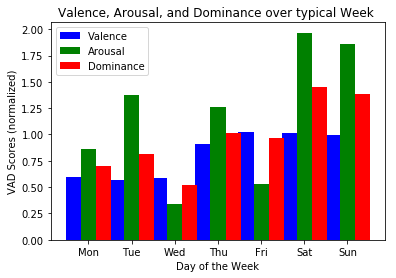

In [3]:
plot_vad_weekday_scores(confessions)

# Visualize nltk Vader across Week

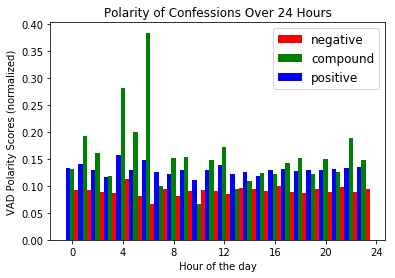

In [4]:
plot_nltk_vader_scores(confessions)

## Train a Word2Vec Model

In [5]:
#Define Model for word embeddings
num_features = 100 # Dimensionality of the hidden layer representation
min_word_count = 35
context = 8
downsampling = 1e-3

model = train_word2vec('extra_clean_comments.csv', num_features,min_word_count,context,downsampling)

2019-12-06 22:23:05,595 : INFO : collecting all words and their counts
2019-12-06 22:23:05,597 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-12-06 22:23:05,756 : INFO : collected 22487 word types from a corpus of 562667 raw words and 8215 sentences
2019-12-06 22:23:05,757 : INFO : Loading a fresh vocabulary
2019-12-06 22:23:05,767 : INFO : effective_min_count=35 retains 1341 unique words (5% of original 22487, drops 21146)
2019-12-06 22:23:05,768 : INFO : effective_min_count=35 leaves 485939 word corpus (86% of original 562667, drops 76728)
2019-12-06 22:23:05,773 : INFO : deleting the raw counts dictionary of 22487 items
2019-12-06 22:23:05,775 : INFO : sample=0.001 downsamples 70 most-common words
2019-12-06 22:23:05,775 : INFO : downsampling leaves estimated 323394 word corpus (66.6% of prior 485939)
2019-12-06 22:23:05,780 : INFO : estimated required memory for 1341 words and 100 dimensions: 1743300 bytes
2019-12-06 22:23:05,781 : INFO : resetting 

Training model...


2019-12-06 22:23:05,804 : INFO : training model with 8 workers on 1341 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=8
2019-12-06 22:23:06,047 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-12-06 22:23:06,055 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-12-06 22:23:06,058 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-12-06 22:23:06,058 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-12-06 22:23:06,059 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-06 22:23:06,061 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-06 22:23:06,065 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-06 22:23:06,067 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-06 22:23:06,069 : INFO : EPOCH - 1 : training on 562667 raw words (322883 effective words) took 0.3s, 1244971 effec

Total time: 1.5105409622192383 secs


In [6]:
Z = model.wv.syn0

# Cluster and Visualize Word Clouds

In [7]:
#Compute clustering, retrieve top words for visualization.
centers, clusters = clustering_on_wordvecs(Z, 1);
centroid_map = dict(zip(model.wv.index2word, clusters));
top_words = get_top_words(model.wv.index2word, 30, centers, Z);

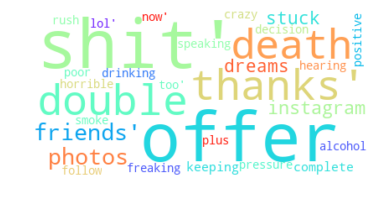

In [8]:
cmaps = 'rainbow'
display_cloud(Z,model,0, cmaps, top_words, label='total')

## Visualize similarity table

In [9]:
# Inspect the word 2 vec model results
tags = ['stressed','sad','relationship','school' ]
similarity_table = visualize_similarity_table(tags, model)
print(similarity_table)

     stressed        sad relationship     school
0        busy     guilty     feelings       high
1         tbh        bad      partner    classes
2   potential  depressed    boyfriend    college
3  struggling    feeling          sex  roommates
4     growing   insecure          fwb        gpa
5    confused    worried          now    quarter
6    horrible     scared     distance       year
7        fear   honestly         lost      years
8   extremely     afraid         long     grades
9    positive        now      feeling       grad


## Demo of auto-tagging a new confession

In [10]:
##  load in new confession to be tagged.
confession = "I am having a really rough day, my girl just dumped with me, AND I failed an exam."

In [11]:
similarity_scores = compute_similarity_scores(confession, tags, model)
suggest_tags = generate_tag_suggestions(similarity_scores, tags, threshold=0.75)
print(suggest_tags)

['sad']
